<a href="https://colab.research.google.com/github/navyakarna/PYTORCH_CV/blob/main/LENET_HANDSon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BUILDING AN IMAGE CLASSIFICATION MODEL USING LeNet


Yann LeCun - founder
have 5 layers - first CNN
simple structure


imput layer - 32X32X1
^ filter size = 5 x 5 so ,

(32 - 5 + 2*0)/1 + 1 = 28

(32 - 5 + 2*0)/1 + 1 = 28

- conv1 (layer stride - 1) (28x28x6)
- Avg pooling layer (stride = 2)
^ for every kind of avg pool the stride is always 2 (no matter what)

for spatial dimemsions

output size = (input size - output size / stride ) + 1


height = 28 - 2 /2 + 1 = 26/2 + 1
13 + 1
= 14

width = 28 - 2 /2 + 1 = 26/2 + 1
13 + 1
= 14

- conv2 (14 X14X6)

**(AFTER THE FIRST TIME POOLING , THE IMAGE GET S SOME DEPTH NOW )**

**(SO THE FILTER IS APPLIED ALL THROUGH DEEP THE DEPTH AND ACROSS THE IMAGE) **






SO NOW THE FILTER IS = 5X5X6 (DEPTH OF 6 )

CONV 2 = 10 X 10 X 16


AVG POOL = 5 X 5 X 16

OUTPUT SIZE = 400 ( FULLY CONNECTED LAYER )

- SOFTMAX

In [ ]:
import os
from PIL import Image




In [ ]:
from zipfile import ZipFile, BadZipFile

zip_file_path = '/content/Archive.zip'
extract_to_path = '/content/'

try:
      with ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path)
            print(f"Extracted files to {extract_to_path}")
except FileNotFoundError:
            print(f"Error: File not found at {zip_file_path}")
except BadZipFile:
            print(f"Error: Invalid or corrupted zip file at {zip_file_path}")

Extracted files to /content/


In [ ]:
folder = '/content/Human Action Recognition/train'
activity = '/content/Human Action Recognition/train/cycling'
img_name = '/content/Human Action Recognition/train/cycling'

In [ ]:
folder = '/content/Human Action Recognition/train'
activity = 'cycling' # Changed to the subfolder name
# Get a list of all image files in the activity folder
img_files = [f for f in os.listdir(os.path.join(folder, activity)) if os.path.isfile(os.path.join(folder, activity, f))]
# Select the first image file, or randomly choose one if you prefer
img_name = img_files[0]
# Now construct the correct image path
img_path = os.path.join(folder, activity, img_name)
image = Image.open(img_path)
image.show()

In [ ]:
print(image.size)
print(image.mode)

(173, 280)
RGB


In [ ]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)), #lenet was supposed to be processing images of size 32X32 , so we need to transform the image
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5)) #all three channels got the means and standard deviation in order to be normalised


])

In [ ]:
train_data_path = '/content/Human Action Recognition/train'
test_data_path = '/content/Human Action Recognition/test'

In [ ]:
train_data = datasets.ImageFolder(root=train_data_path, transform=transform)
test_data = datasets.ImageFolder(root=test_data_path, transform=transform)

In [ ]:
print(train_data.classes)
num_classes = len(train_data.classes)
print(num_classes)

['cycling', 'dancing', 'drinking', 'eating', 'sitting']
5


Counter({'sitting': 714, 'cycling': 1, 'dancing': 1, 'drinking': 1, 'eating': 1})
Counter({'sitting': 714, 'cycling': 714, 'dancing': 1, 'drinking': 1, 'eating': 1})
Counter({'sitting': 714, 'cycling': 714, 'dancing': 714, 'drinking': 1, 'eating': 1})
Counter({'sitting': 714, 'cycling': 714, 'dancing': 714, 'drinking': 714, 'eating': 1})
Counter({'sitting': 714, 'cycling': 714, 'dancing': 714, 'drinking': 714, 'eating': 714})


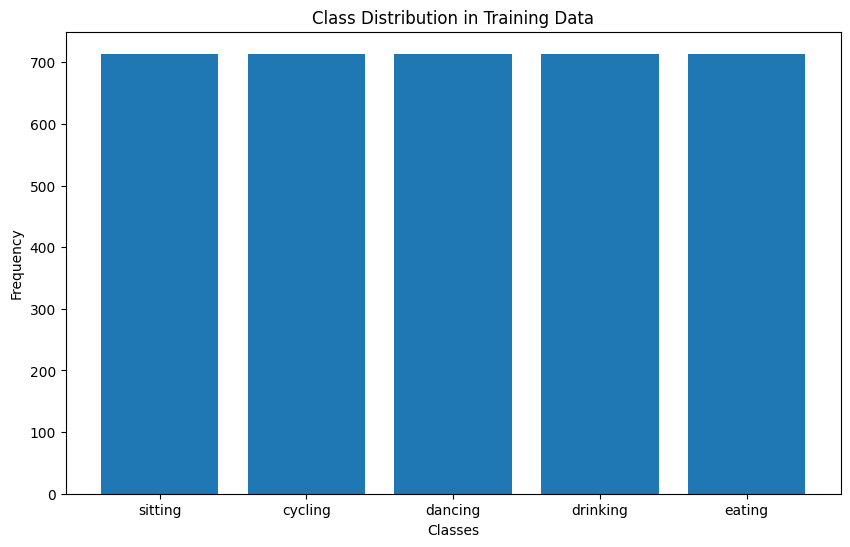

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

class_distribution = Counter([label for label in os.listdir(train_data_path) if os.path.isdir(os.path.join(train_data_path))])

for label in class_distribution:
  class_distribution[label] = len(os.listdir(os.path.join(train_data_path, label)))


  print(class_distribution)

plt.figure(figsize=(10,6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Distribution in Training Data')
plt.show()

LeNet Architecture

in the original structure , avg pooling method was used , but here we will use max pooling in order to reduce the features.


In [ ]:
import torch
import torch.nn as nn


class LeNet5(nn.Module):
  def __init__(self, num_classes=10):
    super(LeNet5, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, padding=0, stride=1 )
    self.conv2 = nn.Conv2d(6 , 16 , kernel_size = 5, padding=0, stride=1)
    # Changed the input size of fc1 to 400 to match the flattened output
    self.fc1= nn.Linear(400, 84)
    self.fc2 = nn.Linear(84, num_classes)

  def forward(self, x):
    x = torch.nn.functional.relu(self.conv1(x))
    x = torch.nn.functional.max_pool2d(x, kernel_size=2, stride=2)
    x = torch.nn.functional.relu(self.conv2(x))
    x = torch.nn.functional.max_pool2d(x, kernel_size=2, stride=2)
    x = torch.flatten(x, 1)
    x = torch.nn.functional.relu(self.fc1(x))
    x = torch.nn.functional.relu(self.fc2(x))
    # Removed the undefined fc3 layer
    # Assuming fc2 is the output layer
    return x #or return torch.nn.functional.log_softmax(x, dim=1)  # Applying softmax for classification

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cpu')

In [ ]:
model = LeNet5().to(device)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr=0.001)


In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
# Train the model
num_epochs = 20
best_accuracy = 0.0
epochs_since_best = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100. * correct / total

    # Evaluate the model
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        # Change val_loader to test_loader here
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)

            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(test_loader) # Change len(val_loader) to len(test_loader)
    val_accuracy = 100. * correct / total

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {val_loss:.4f}, Test Accuracy: {val_accuracy:.2f}%')

    # Check for best accuracy and stop if not improved after two more epochs
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        epochs_since_best = 0
        print(f'New best accuracy: {best_accuracy:.2f}%')
    else:
        epochs_since_best += 1
        if epochs_since_best > 2:
            print("Stopping early: no improvement after two consecutive epochs.")
            break

100%|██████████| 112/112 [00:07<00:00, 15.14it/s]


Epoch [1/20], Train Loss: 2.0015, Train Accuracy: 31.04%, Test Loss: 1.8044, Test Accuracy: 37.30%
New best accuracy: 37.30%


100%|██████████| 112/112 [00:07<00:00, 15.43it/s]


Epoch [2/20], Train Loss: 1.8255, Train Accuracy: 35.52%, Test Loss: 1.7619, Test Accuracy: 37.30%


100%|██████████| 112/112 [00:06<00:00, 17.44it/s]


Epoch [3/20], Train Loss: 1.7600, Train Accuracy: 38.74%, Test Loss: 1.6603, Test Accuracy: 44.60%
New best accuracy: 44.60%


100%|██████████| 112/112 [00:07<00:00, 15.20it/s]


Epoch [4/20], Train Loss: 1.6618, Train Accuracy: 43.81%, Test Loss: 1.5740, Test Accuracy: 48.41%
New best accuracy: 48.41%


100%|██████████| 112/112 [00:06<00:00, 17.33it/s]


Epoch [5/20], Train Loss: 1.6046, Train Accuracy: 45.63%, Test Loss: 1.5492, Test Accuracy: 47.62%


100%|██████████| 112/112 [00:07<00:00, 15.20it/s]


Epoch [6/20], Train Loss: 1.4673, Train Accuracy: 47.87%, Test Loss: 1.2362, Test Accuracy: 50.16%
New best accuracy: 50.16%


100%|██████████| 112/112 [00:07<00:00, 15.61it/s]


Epoch [7/20], Train Loss: 1.1947, Train Accuracy: 54.29%, Test Loss: 1.2072, Test Accuracy: 52.22%
New best accuracy: 52.22%


100%|██████████| 112/112 [00:06<00:00, 17.51it/s]


Epoch [8/20], Train Loss: 1.1397, Train Accuracy: 55.91%, Test Loss: 1.1581, Test Accuracy: 56.19%
New best accuracy: 56.19%


100%|██████████| 112/112 [00:07<00:00, 15.20it/s]


Epoch [9/20], Train Loss: 1.0905, Train Accuracy: 58.18%, Test Loss: 1.1100, Test Accuracy: 56.83%
New best accuracy: 56.83%


100%|██████████| 112/112 [00:06<00:00, 17.40it/s]


Epoch [10/20], Train Loss: 1.0556, Train Accuracy: 59.69%, Test Loss: 1.0695, Test Accuracy: 58.89%
New best accuracy: 58.89%


100%|██████████| 112/112 [00:07<00:00, 15.93it/s]


Epoch [11/20], Train Loss: 1.0363, Train Accuracy: 60.67%, Test Loss: 1.0893, Test Accuracy: 56.35%


100%|██████████| 112/112 [00:07<00:00, 15.24it/s]


Epoch [12/20], Train Loss: 1.0036, Train Accuracy: 61.48%, Test Loss: 1.1384, Test Accuracy: 55.87%


100%|██████████| 112/112 [00:06<00:00, 16.77it/s]


Epoch [13/20], Train Loss: 0.9757, Train Accuracy: 63.45%, Test Loss: 1.0767, Test Accuracy: 57.14%
Stopping early: no improvement after two consecutive epochs.


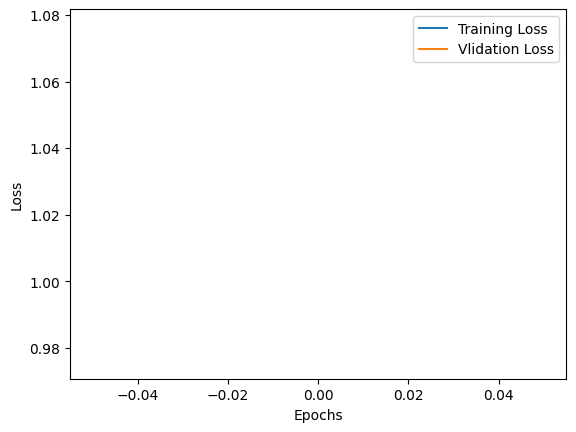

In [ ]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Vlidation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()